In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')

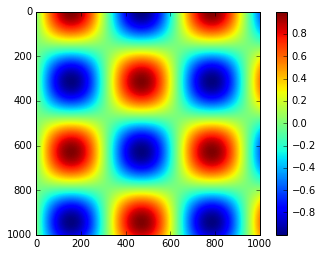

In [2]:
%matplotlib inline
import numpy as np
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar();

In [15]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """渡されたカラーマップのグレースケール版を返す"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
# RGBAを知覚輝度に変換する
# http://alienryderflex.com/hsp.htmlを参照
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]

    return LinearSegmentedColormap.from_list(cmap.name + '_gray', colors, cmap.N)

def view_colormap(cmap):
    """カラーマップをグレースケール版と並べて表示する"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2),
                          subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

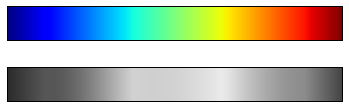

In [16]:
view_colormap('jet')

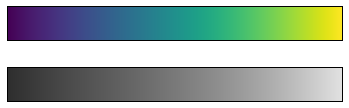

In [18]:
view_colormap('viridis')

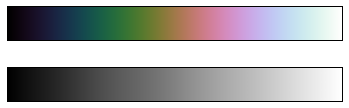

In [19]:
view_colormap('cubehelix')

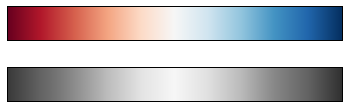

In [20]:
view_colormap('RdBu') # 平均値からの正負の偏差を示すのに適している。

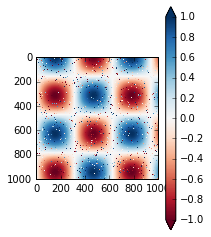

In [22]:
# 画像のピクセルに1%のノイズを乗せる
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1);

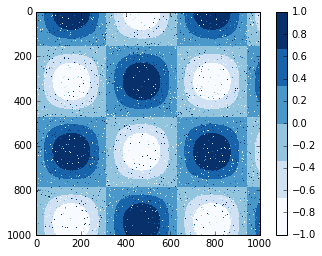

In [23]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1, 1);

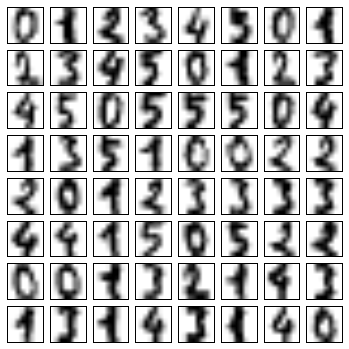

In [28]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)
fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

In [29]:
# 数字データをIsomapを使用して2次元に投影する
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

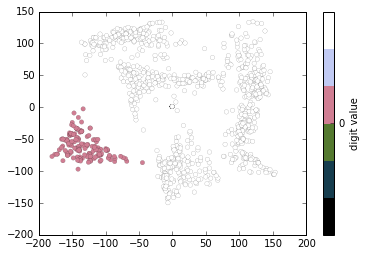

In [30]:
# 結果のプロット
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1, 
           c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 0.5)